# Import The Libraries

In [376]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Loading The Dataset

In [377]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BIA/My projects/Customer Churn Prediction/BankChurners.csv")
df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

# Info Of Dataframe

In [378]:
#The shape of the dataset.....
df.shape

(10127, 23)

In [379]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

In [380]:
#The shape of the dataset.....
df.shape

(10127, 20)

In [381]:
#The dimensions of the dataset.......
df.ndim

2

In [382]:
#The size of the dataset.......
df.size

202540

In [383]:
#The columns we have in the dataset.....
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [384]:
#The dtypes we have in the dataset.....
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [385]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Checking NAN Values :-

<Axes: >

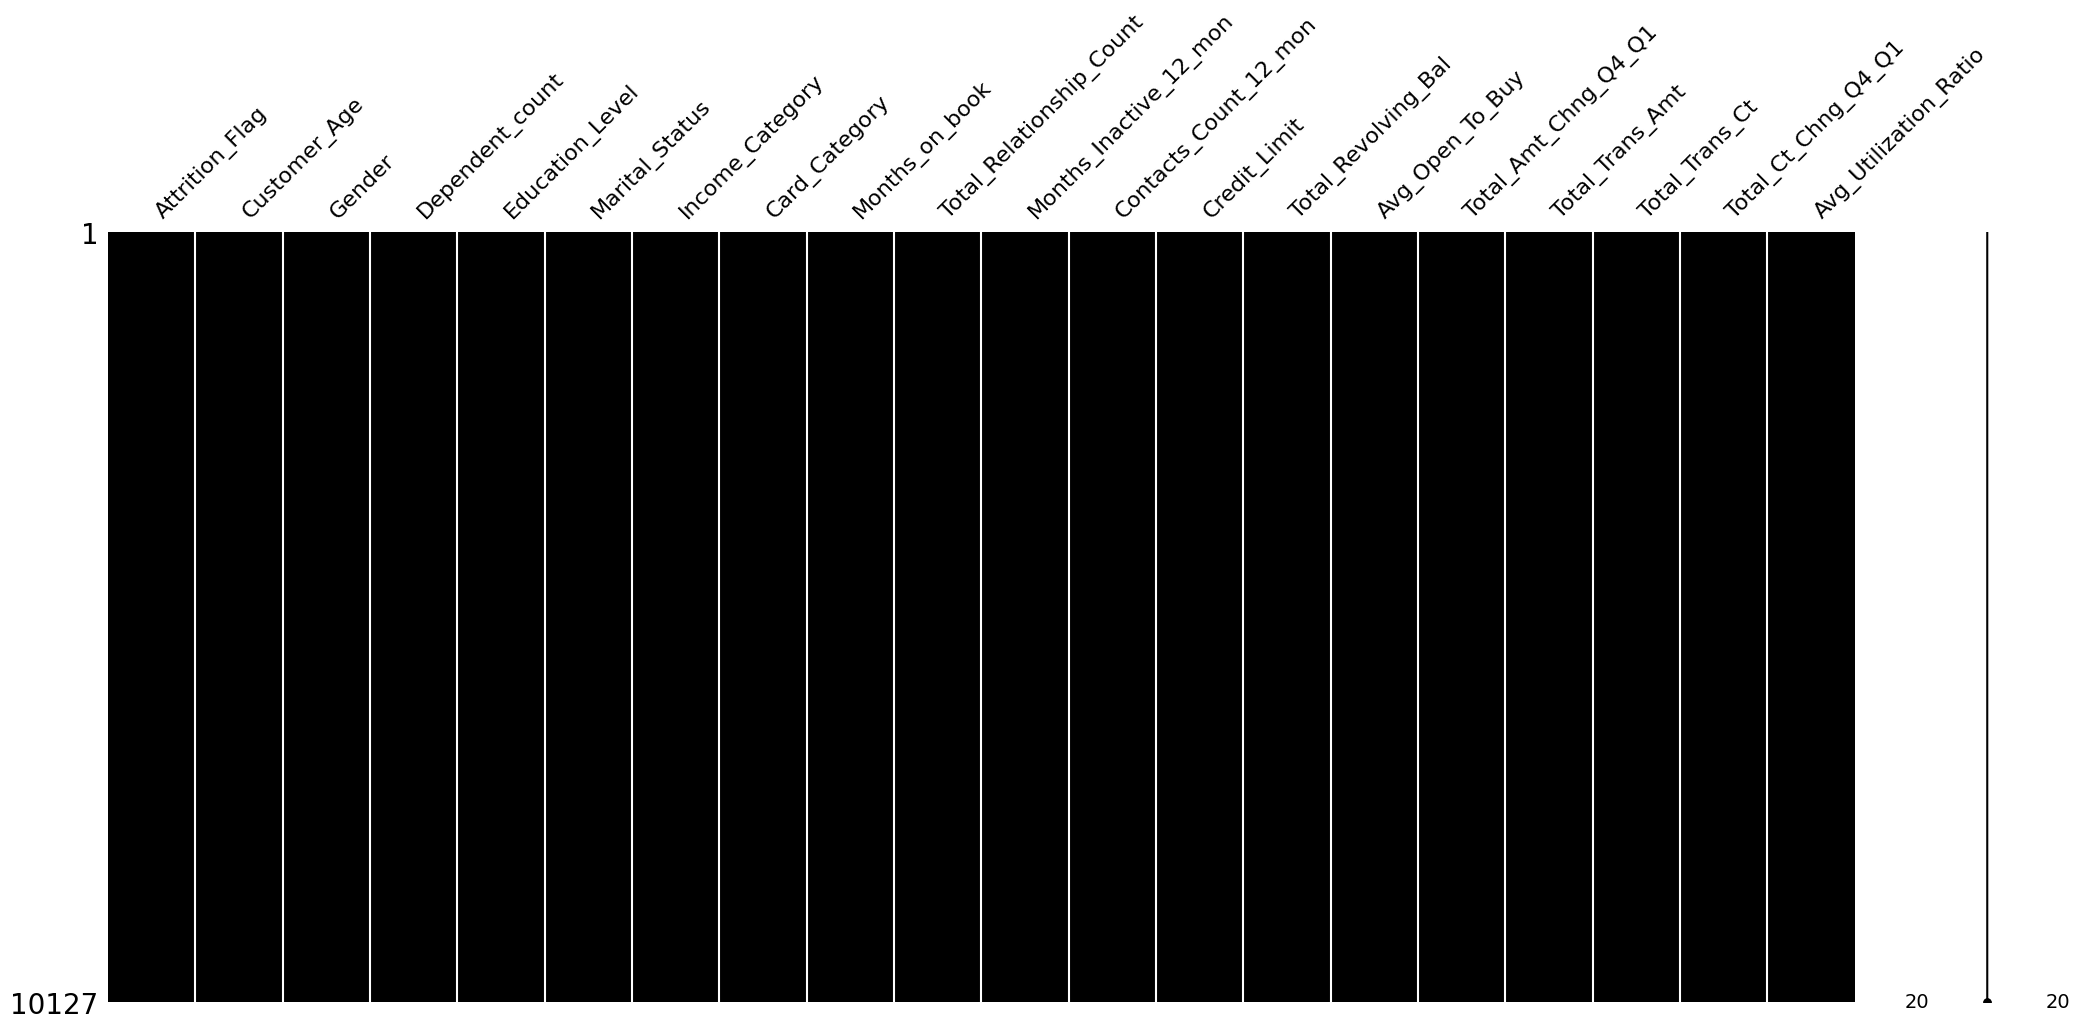

In [386]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [387]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

#Finding The Duplicate Records :-


In [388]:
#Finding the duplicates from dataset...
df[df.duplicated()]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [389]:
# Statistics on Categorical data......
round(df.describe(exclude = 'object'), 2).style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [390]:
# Statistics on numerical data
round(df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [391]:
df.head().style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [392]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [393]:
df.head().style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

# Detecting The Outliers :-

In [394]:
#Finding the outliers....
continuous_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Colors = ['#f03a17']
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    fig = px.histogram(df, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()
    print("Skewness: %f" % df['Attrition_Flag'].skew())
    print("Kurtosis: %f" % df['Attrition_Flag'].kurt())

Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


# EDA & Visualization On Numerical Analysis

In [395]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of numerical variables:  15


Numberical Variables Column:  ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']




# Analysis The Attrition_Flag :-

In [396]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [397]:
df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts()) 
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag'].style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [398]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(), 
                      x = df['Attrition_Flag'].value_counts().index, 
                      text=df['Attrition_Flag'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10500])
iplot(fig)

# Analysis The Customer_Age :-

In [399]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts()) 
              for var in {'Customer_Age'}}
multi_table([ df_nunique['Customer_Age'].style.set_properties(**{"background-color": "blue","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [400]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(), 
                      x = df['Customer_Age'].value_counts().index, 
                      text=df['Customer_Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,650])
iplot(fig)

In [401]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df['Customer_Age']<=35),'Age']=0
df.loc[(df['Customer_Age']>35)&(df['Customer_Age']<=45),'Age']=1
df.loc[(df['Customer_Age']>45)&(df['Customer_Age']<=55),'Age']=2
df.loc[(df['Customer_Age']>55)&(df['Customer_Age']<=65),'Age']=3
df.loc[df['Customer_Age']>65,'Age']=4
df['Age']=df['Age'].astype(int)

In [402]:
df.drop(['Customer_Age'],axis = 1,inplace = True)

In [403]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts()) 
              for var in {'Age'}}
multi_table([ df_nunique['Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [404]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(), 
                      x = df['Age'].value_counts().index, 
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [405]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Dependent_count :-

In [406]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts()) 
              for var in {'Dependent_count'}}
multi_table([ df_nunique['Dependent_count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [407]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(), 
                      x = df['Dependent_count'].value_counts().index, 
                      text=df['Dependent_count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3200])
iplot(fig)



In [408]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Months_on_book :-

In [409]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts()) 
              for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [410]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Months_on_book'].value_counts().values.tolist(), 
                      x = df['Months_on_book'].value_counts().index, 
                      text=df['Months_on_book'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2800])
iplot(fig)

In [411]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book']<=10),'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book']<=20),'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30),'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40),'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50,'Bank_Relationship_Period']=4

In [412]:
df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

In [413]:
df.drop(['Months_on_book'],axis = 1,inplace = True)

In [414]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts()) 
              for var in {'Bank_Relationship_Period'}}
multi_table([ df_nunique['Bank_Relationship_Period'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [415]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Bank_Relationship_Period'].value_counts().values.tolist(), 
                      x = df['Bank_Relationship_Period'].value_counts().index, 
                      text=df['Bank_Relationship_Period'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6500])
iplot(fig)

In [416]:
fig = px.histogram(df, x="Bank_Relationship_Period", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Relationship_Count

In [417]:
df_nunique = {var: pd.DataFrame(df['Total_Relationship_Count'].value_counts()) 
              for var in {'Total_Relationship_Count'}}
multi_table([ df_nunique['Total_Relationship_Count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [418]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Total_Relationship_Count'].value_counts().values.tolist(), 
                      x = df['Total_Relationship_Count'].value_counts().index, 
                      text=df['Total_Relationship_Count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2500])
iplot(fig)

In [419]:
fig = px.histogram(df, x="Total_Relationship_Count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Months_Inactive_12_mon

In [420]:
df_nunique = {var: pd.DataFrame(df['Months_Inactive_12_mon'].value_counts()) 
              for var in {'Months_Inactive_12_mon'}}
multi_table([ df_nunique['Months_Inactive_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [421]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Months_Inactive_12_mon'].value_counts().values.tolist(), 
                      x = df['Months_Inactive_12_mon'].value_counts().index, 
                      text=df['Months_Inactive_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4500])
iplot(fig)

In [422]:
fig = px.histogram(df, x="Months_Inactive_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Contacts_Count_12_mon 

In [423]:
df_nunique = {var: pd.DataFrame(df['Contacts_Count_12_mon'].value_counts()) 
              for var in {'Contacts_Count_12_mon'}}
multi_table([ df_nunique['Contacts_Count_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [424]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Contacts_Count_12_mon'].value_counts().values.tolist(), 
                      x = df['Contacts_Count_12_mon'].value_counts().index, 
                      text=df['Contacts_Count_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [425]:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Credit_Limit 

In [426]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Credit_Limit']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])

iplot(fig)

In [427]:
fig = px.histogram(df, x="Credit_Limit")
fig.show()

In [428]:
fig = px.histogram(df, x="Credit_Limit", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Revolving_Bal

In [429]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Revolving_Bal']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3500])
iplot(fig)

In [430]:
fig = px.histogram(df, x="Total_Revolving_Bal")
fig.show()

In [431]:
fig = px.histogram(df, x="Total_Revolving_Bal", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Avg_Open_To_Buy

In [432]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Open_To_Buy']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])
iplot(fig)

In [433]:
fig = px.histogram(df, x="Avg_Open_To_Buy")
fig.show()

In [434]:
fig = px.histogram(df, x="Avg_Open_To_Buy", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

<h1 style="color:#323232;font-size:35px;font-family:Georgia;text-align:center;"><strong>✏️Analysis <strong style="color:#2c2bce;font-size:25px;font-family:Georgia;">The <strong style="color:#323232;font-size:35px;font-family:Georgia;">Total_Amt_Chng_Q4_Q1
 <strong style="color:#2c2bce;font-size:25px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [435]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Amt_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5])
iplot(fig)

In [436]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1")
fig.show()

In [437]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

<h1 style="color:#323232;font-size:35px;font-family:Georgia;text-align:center;"><strong>✏️Analysis <strong style="color:#2c2bce;font-size:25px;font-family:Georgia;">The <strong style="color:#323232;font-size:35px;font-family:Georgia;">Total_Trans_Amt
 <strong style="color:#2c2bce;font-size:25px;font-family:Georgia;">:- </strong></strong></strong></strong></h1>

In [438]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Amt']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,20000])
iplot(fig)

In [439]:
fig = px.histogram(df, x="Total_Trans_Amt")
fig.show()

In [440]:
fig = px.histogram(df, x="Total_Trans_Amt", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Trans_Ct

In [441]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Ct']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

In [442]:
fig = px.histogram(df, x="Total_Trans_Ct")
fig.show()

In [443]:
fig = px.histogram(df, x="Total_Trans_Ct", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Total_Ct_Chng_Q4_Q1 

In [444]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Ct_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6])
iplot(fig)

In [445]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1")
fig.show()

In [446]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Avg_Utilization_Ratio

In [447]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Utilization_Ratio']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3])
iplot(fig)

In [448]:
fig = px.histogram(df, x="Avg_Utilization_Ratio")
fig.show()

In [449]:
fig = px.histogram(df, x="Avg_Utilization_Ratio", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# EDA & Visualization On Categorical Analysis

In [450]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print("\n")
print('Categorical variables column name:',cat_features)
print("\n")
# visualise the numerical variables........
df[cat_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of categorical variables:  5


Categorical variables column name: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']




# Analysis The Gender

In [451]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts()) 
              for var in {'Gender'}}
multi_table([ df_nunique['Gender'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [452]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(), 
                      x = df['Gender'].value_counts().index, 
                      text=df['Gender'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,8000])
iplot(fig)

In [453]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Education_Level


In [454]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts()) 
              for var in {'Education_Level'}}
multi_table([ df_nunique['Education_Level'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [455]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(), 
                      x = df['Education_Level'].value_counts().index, 
                      text=df['Education_Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [456]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Marital_Status 

In [457]:
df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts()) 
              for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [458]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(), 
                      x = df['Marital_Status'].value_counts().index, 
                      text=df['Marital_Status'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [459]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Income_Category 

In [460]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts()) 
              for var in {'Income_Category'}}
multi_table([ df_nunique['Income_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [461]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(), 
                      x = df['Income_Category'].value_counts().index, 
                      text=df['Income_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [462]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Analysis The Card_Category 

In [463]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts()) 
              for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [464]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(), 
                      x = df['Card_Category'].value_counts().index, 
                      text=df['Card_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10000])
iplot(fig)

In [465]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

# Visualize The Correlation Between Dependent And Independent Dependent Features

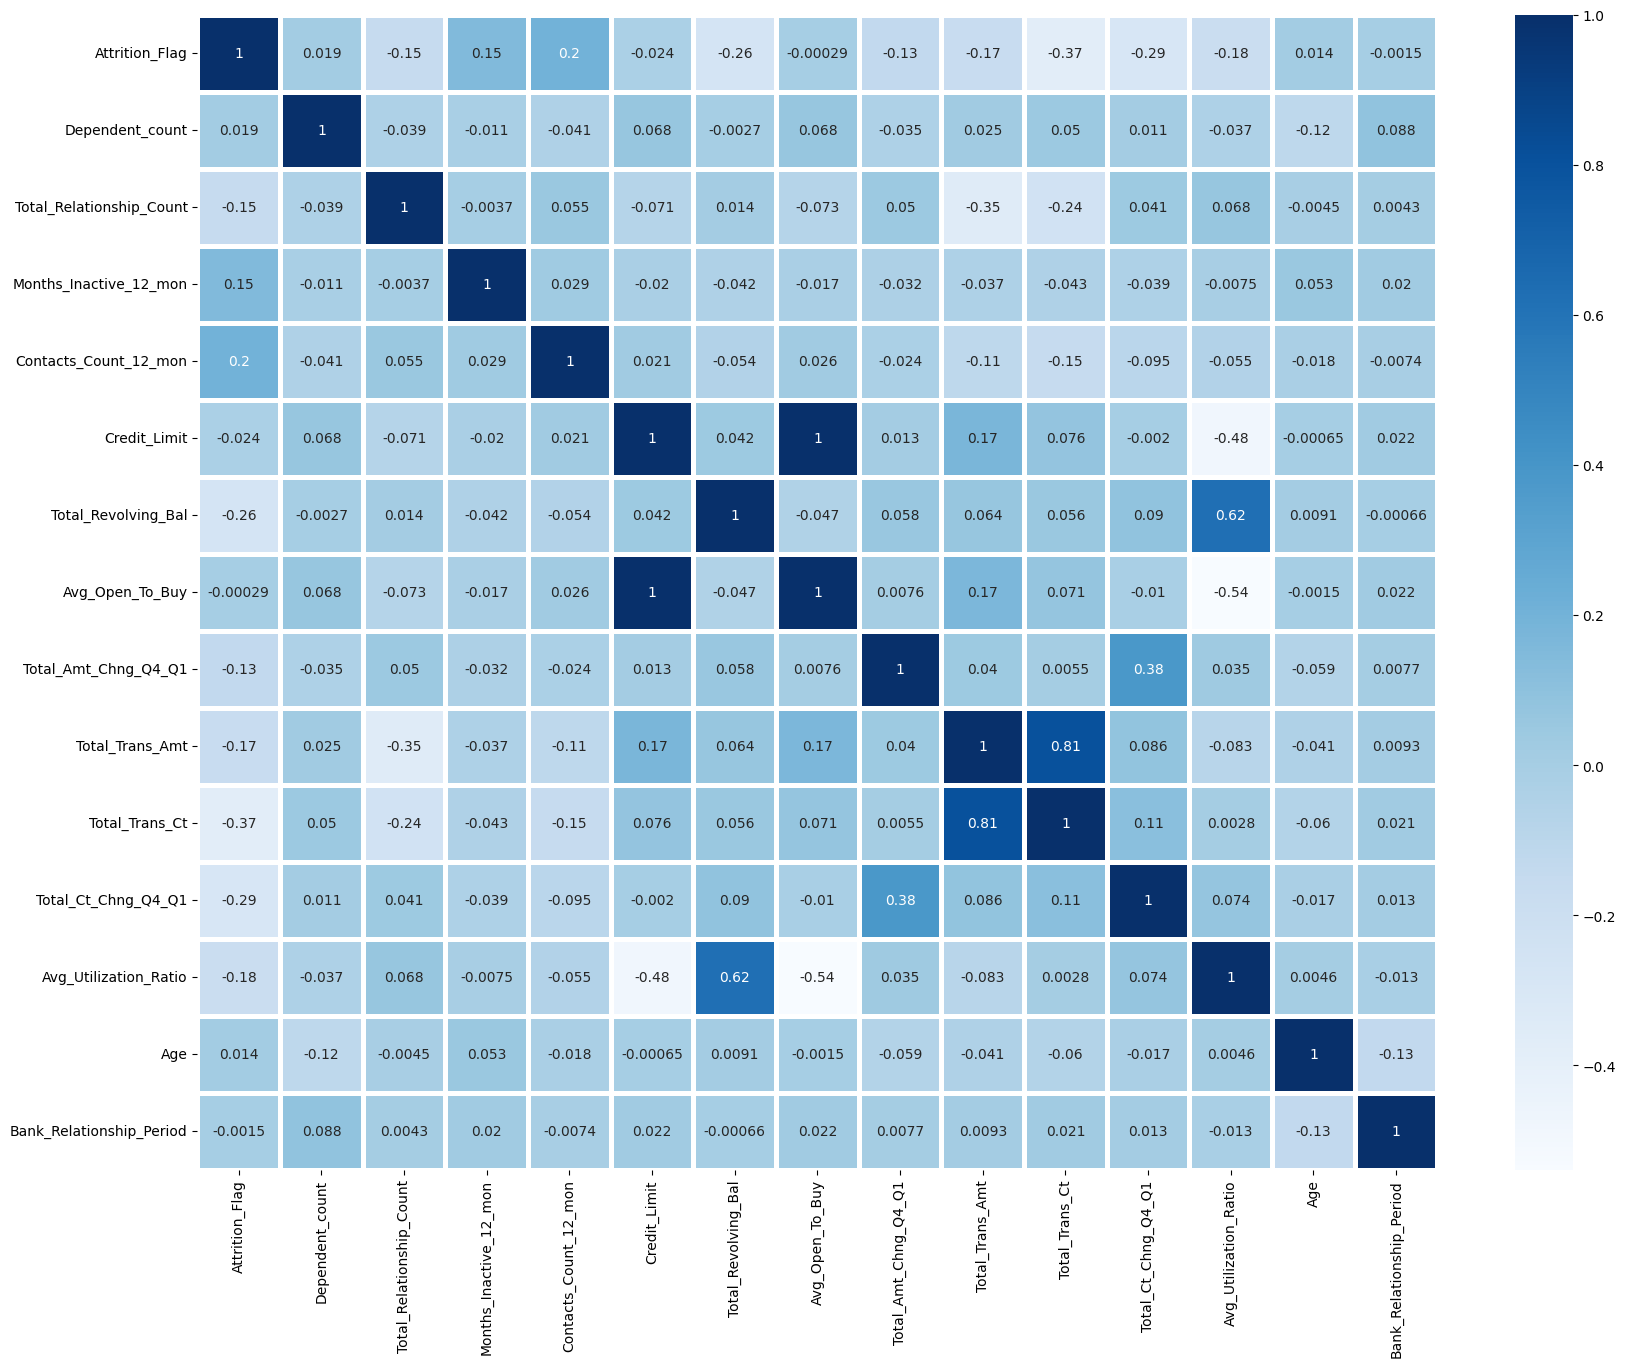

In [466]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

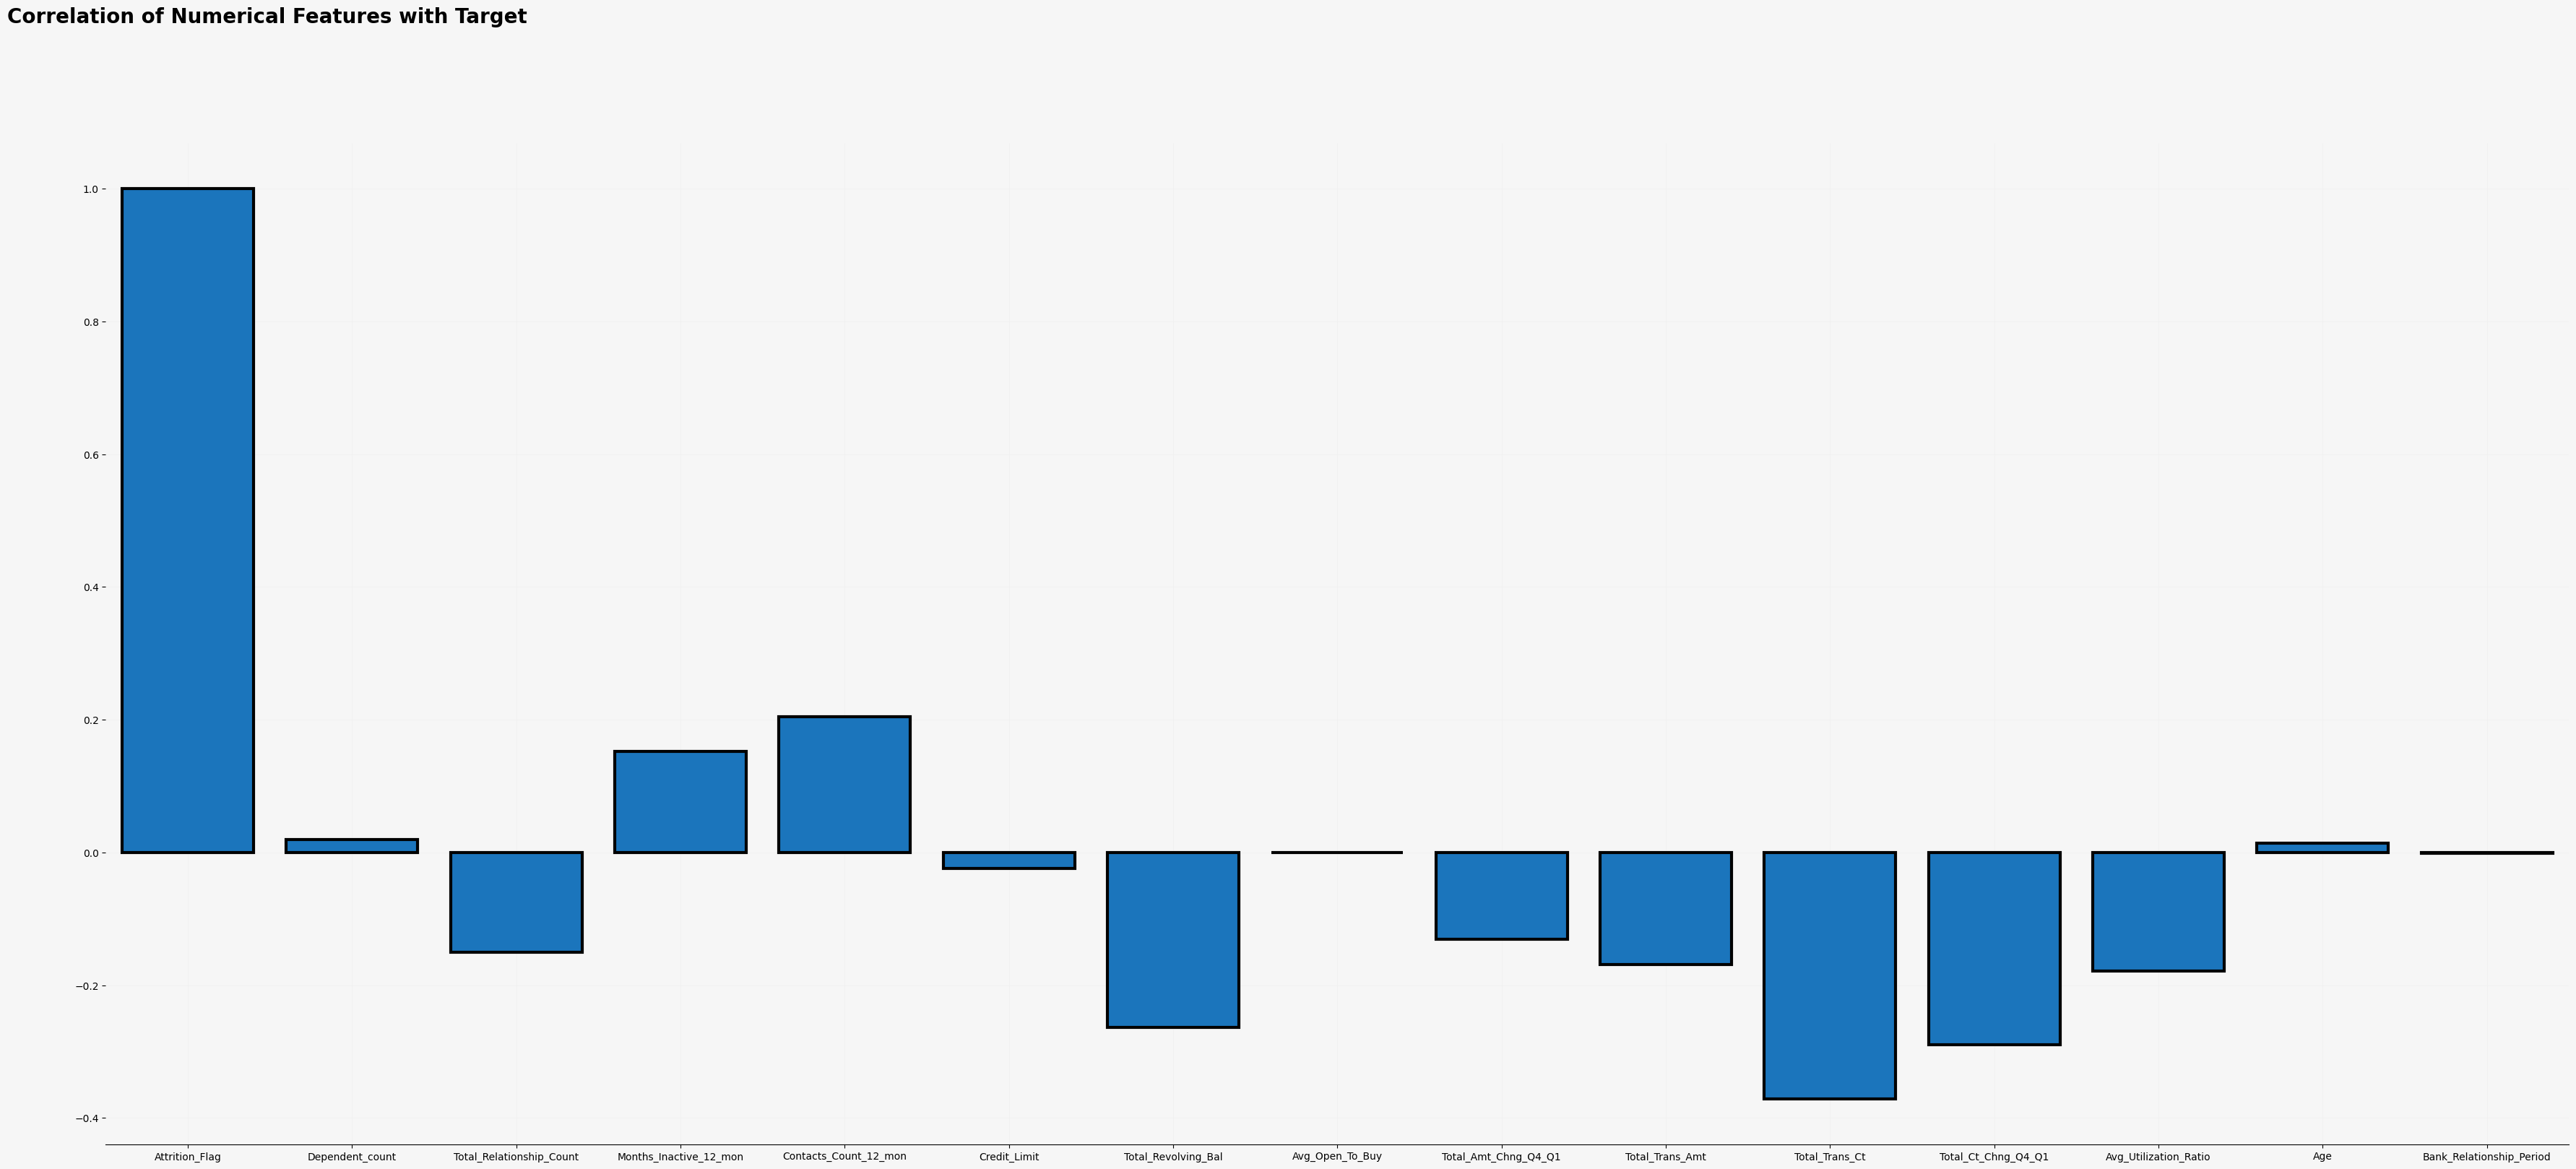

In [467]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

# Encoding The Categorical Features

In [468]:
#Now one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 38)


In [469]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Pla

In [470]:
#Rearrangement of the columns......
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]
df.head(2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

# Scaling The Dataset

In [471]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [472]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

# Split The Features Into Training & Into Testing Dataset

In [473]:
X = scaled_features
y = df['Attrition_Flag']

In [474]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

# Visualize Model Score

In [475]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.954430        0.006555  RandomForestClassifier
1              0.962613        0.006193      AdaBoostClassifier
2              0.954430        0.006180       Gradient Boosting
3              0.927624        0.005426    ExtraTreesClassifier
4              0.934396        0.008823  DecisionTreeClassifier


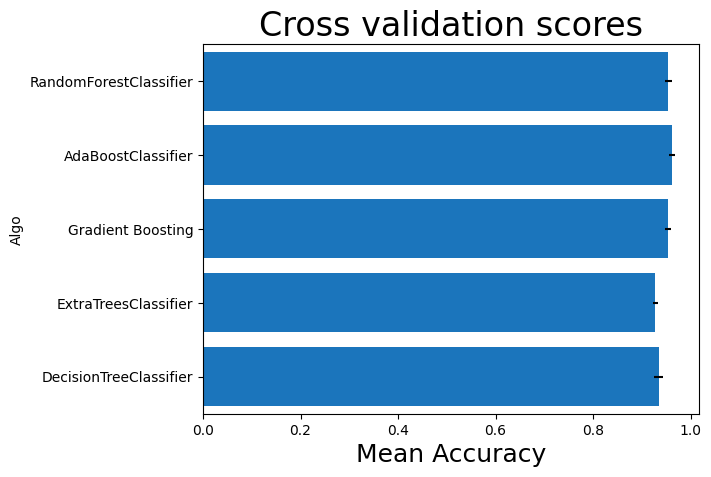

<Figure size 1200x800 with 0 Axes>

In [476]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})
g = sns.barplot(x="CrossVal_Score_Means",y="Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

In [477]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [478]:
confusion_matrix(y_test, y_pred)

array([[2485,   98],
       [ 100,  356]])

In [479]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2583
           1       0.78      0.78      0.78       456

    accuracy                           0.93      3039
   macro avg       0.87      0.87      0.87      3039
weighted avg       0.93      0.93      0.93      3039



In [480]:
print(accuracy_score(y_test, y_pred))

0.9348469891411648


# Hyper Parameter Tunning

In [481]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [482]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)  

In [483]:
print(accuracy_score(y_test, y_pred))

0.9480092135570911


In [484]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2583
           1       0.86      0.78      0.82       456

    accuracy                           0.95      3039
   macro avg       0.91      0.88      0.89      3039
weighted avg       0.95      0.95      0.95      3039



In [485]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 7}
0.9448360777303207


# Conclusion


1.There are 16.07% of customers who have churned.<br>
    <br>
2.The proportion of gender count is almost equally distributed (52.9% male and 47.1%) compare to proportion of existing and attributed customer count (83.9% and 16.1%) which is highly imbalanced.<br>
    <br>
3.The proportion of attrited customers by gender there are 14.4% more male than female who have churned.<br>
    <br>
4.Customers who have churned are highly educated - A high proportion of education level of attrited customer is Graduate level (29.9%), followed by Post-Graduate level (18.8%).<br>
    <br>
5.A high proportion of marital status of customers who have churned is Married (43.6%), followed by Single (41.1%) compared to Divorced (7.4%) and Unknown (7.9%) status - Marital stuats of the attributed customers are highly clustered in Married status and Single.<br>
    <br>
6.As you can see from the proportion of income category of attrited customer, it is highly concentrated around $60K - $80K income (37.6%), followed by Less than *$40k income *(16.7%) compare to attrited customers with higher annual income of 80K-120K(14.9%) and over $120K + (11.5%). I assume that customers with higher income doesn't likely to leave their credit card services than meddle-income customer.<br>
    <br></p></h2>